### Consumer Banking Campaign Classification Project

######  Retail Analytics,2022

#### Problem Statement
- Over the course of the Financial year xxxx, the response rate to campaign and promotions have been less than 15%
- In a bid to improve the response rate, save cost of campaigning to customers that would not give any form of conversion and also improve targeted marketing, the xxxxteam is building a classification Machine Learning Model to would predict whether a customer would responded to a funding or transaction campaign or not.
- The model would oredict customer likely response to a campaign.
- The AS-IS campaign response is:
<table>
   <thead>
      <tr>
         <th>Campaign Type</th>
         <th>Total Customers</th>
         <th>Response Rate</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <td>Funding</td>
         <td>3.18m</td>
         <td>3%</td>
      </tr>
      <tr>
         <td>Transaction</td>
         <td>1.6m</td>
         <td>3%</td>
      </tr>
   </tbody>
</table>


- The Objective of the model is to increase the campaign to 6%

#### Dataset
The dataset contains 1 target and 20 features, the features are split into different segments

- Customer Demography
- Customer Geography
- Customer Transaction
- Customer Segment
- Customer Category
- Customer Debt status

#### Choice of Algorithm

- Random Forest
- Artificial Neural Network


#### Different classification algorithms would be run simulteanously, the best algorithm would be selected using the:
- classification metrics (Accuracy, F1 score, Precision/Recall)
- Receiver Operation Characteristics (ROC curve)
- Confusion Matrix

#### Improving the Model
A/B testing would be employed to the test data that would fed into the model, to improve model.

#### Data Cleaning
The Data cleaning was done using power query in excel

### Data Dictionary
<table>
   <thead>
      <tr>
         <th>Feature</th>
         <th>Meaning</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <td>USSD_COUNT</td>
         <td>The count of the transactions done on the USSD platform</td>
      </tr>
      <tr>
         <td>USSD_VOLUME</td>
         <td>The volume of the transactions done on the USSD platform</td>
      </tr>
       <tr>
         <td>MOBILE_COUNT</td>
         <td>The count of the transactions done on the MOBILE APP platform</td>
      </tr>
       <tr>
         <td>MOBILE_VOLUME</td>
         <td>The volume of the transactions done on the MOBILE APP platform</td>
      </tr>
       <tr>
         <td>AGE</td>
         <td>The age of the customer</td>
      </tr>
      <tr>
         <td>ACCOUNT AGE</td>
         <td>Measures how long the customers had been banking with the bank</td>
      </tr>
       <tr>
         <td>BALANCE</td>
         <td>The balance in the customer's account</td>
      </tr>
       <tr>
         <td>SEGMENT</td>
         <td>The segment the customer belongs to e.g Mass Affluent e.tc</td>
      </tr>
       <tr>
         <td>SEX</td>
         <td>The customer's gender</td>
      </tr>
      <tr>
         <td>REGION NAME</td>
         <td>The region the customer belongs to in the bank's hierarchy</td>
      </tr>
       <tr>
         <td>STATE</td>
         <td>The state the customer's account is domicilied</td>
      </tr>
       <tr>
         <td>MOBILE NETWORK</td>
         <td>The customer's network provider</td>
      </tr>
       <tr>
         <td>CREDIT_COUNT</td>
         <td>The total number of credit transaction in the last 3 months</td>
      </tr>
      <tr>
         <td>CREDIT_TURNOVER</td>
         <td>The total volume of credit transaction in the last 3 months</td>
      </tr>
       <tr>
         <td>DEBIT_COUNT</td>
         <td>The total number of debiy transaction in the last 3 months</td>
      </tr>
       <tr>
         <td>DEBIT_TURNOVER</td>
         <td>The total volume of debit transaction in the last 3 months</td>
      </tr>
        <tr>
         <td>DEBTOR</td>
         <td>Shows if the customer has any outstanding debt in the last 3 months</td>
      </tr>
       <tr>
         <td>FCY_STATUS</td>
         <td>Shows if the customers has an FCY account</td>
      </tr>
       <tr>
         <td>TARGET</td>
         <td>The Response Variable</td>
      </tr>
   </tbody>
</table>

In [1]:
#Importing all the necessary libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,precision_score,accuracy_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, confusion_matrix,plot_confusion_matrix
import scikitplot as skplt
import optuna


warnings.filterwarnings("ignore")

In [2]:
#Import the data set

data = pd.read_excel(r'C:\Users\fifok\Desktop\Data_classification.xlsx')

In [3]:
data.dropna(inplace=True)

In [4]:
#dropping the columns fhat are not needed

data.drop(columns =['CUST_AC_NO','PHONE_EXT'], inplace = True)

In [5]:
df =data.loc[(data['DEBTOR'] == 'Yes') | (data['DEBTOR'] == 'No')]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227315 entries, 0 to 228252
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   USSD_COUNT       227315 non-null  int64  
 1   USSD_VOLUME      227315 non-null  int64  
 2   MOBILE_COUNT     227315 non-null  int64  
 3   MOBILE_VOLUME    227315 non-null  int64  
 4   SEX              227315 non-null  object 
 5   BRANCH_CODE      227315 non-null  int64  
 6   MOBILE_NETWORK   227315 non-null  object 
 7   AGE              227315 non-null  int64  
 8   ACCOUNT_AGE      227315 non-null  int64  
 9   SEGMENT          227315 non-null  object 
 10  REGION_NAME      227315 non-null  object 
 11  STATE            227315 non-null  object 
 12  BALANCE          227315 non-null  float64
 13  CREDIT_TURNOVER  227315 non-null  float64
 14  CREDIT_COUNT     227315 non-null  int64  
 15  DEBIT_TURNOVER   227315 non-null  float64
 16  DEBIT_COUNT      227315 non-null  int6

In [8]:
#creating additional columns: Mobile ratio and USSD ratio

df['MOBILE_RATIO'] = df['MOBILE_COUNT']/df['MOBILE_VOLUME']
df['USSD_RATIO'] = df['USSD_COUNT']/df['USSD_VOLUME']

In [10]:
df.fillna(0,inplace=True)

In [11]:
df

,USSD_COUNT,USSD_VOLUME,MOBILE_COUNT,MOBILE_VOLUME,SEX,BRANCH_CODE,MOBILE_NETWORK,AGE,ACCOUNT_AGE,SEGMENT,...,BALANCE,CREDIT_TURNOVER,CREDIT_COUNT,DEBIT_TURNOVER,DEBIT_COUNT,DEBTOR,FCY_STATUS,TARGET,MOBILE_RATIO,USSD_RATIO
0,0,0,387,3757700,M,81,MTN Nigeria,37,3,MASS AFFLUENT,...,229230.46,1859617.31,44,1891316.01,71,No,No,YES/FUNDED,0.000103,0.000000
1,0,0,17,65631,M,418,Globacom,36,4,MASS MARKET,...,8049.08,79740.91,2,78285.62,4,No,No,NO/FUNDED,0.000259,0.000000
3,177,1926579,0,0,F,369,MTN Nigeria,50,9,MASS MARKET,...,637070.88,237230.56,3,123884.85,11,No,No,YES/FUNDED,0.000000,0.000092
4,0,0,0,0,F,36,MTN Nigeria,34,4,MASS MARKET,...,214049.51,27518.06,1,17334.77,2,No,No,YES/FUNDED,0.000000,0.000000
5,4,10059,44,1012455,F,211,9mobile,30,5,MASS AFFLUENT,...,18752.11,247518.13,34,231215.30,16,No,No,NO/TRANSACTION,0.000043,0.000398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228248,0,0,277,179409872,M,563,MTN Nigeria,46,0,HNI,...,1523768.89,59079360.00,34,59050333.18,97,No,No,YES/FUNDED,0.000002,0.000000
228249,0,0,1,100,F,168,Airtel Nigeria,26,0,MASS MARKET,...,48207.82,57000.00,2,987.50,3,No,No,YES/FUNDED,0.010000,0.000000
228250,1,11,81,3666011,F,373,MTN Nigeria,23,0,MASS MARKET,...,42845.73,1211696.67,34,1204417.22,35,No,No,NO/FUNDED,0.000022,0.090909
228251,14,100857,0,0,F,155,MTN Nigeria,13,0,MASS MARKET,...,41709.30,50000.00,1,16716.67,1,No,No,YES/FUNDED,0.000000,0.000139


In [12]:
df.drop(columns=['FCY_STATUS','DEBTOR'], inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227315 entries, 0 to 228252
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   USSD_COUNT       227315 non-null  int64  
 1   USSD_VOLUME      227315 non-null  int64  
 2   MOBILE_COUNT     227315 non-null  int64  
 3   MOBILE_VOLUME    227315 non-null  int64  
 4   SEX              227315 non-null  object 
 5   BRANCH_CODE      227315 non-null  int64  
 6   MOBILE_NETWORK   227315 non-null  object 
 7   AGE              227315 non-null  int64  
 8   ACCOUNT_AGE      227315 non-null  int64  
 9   SEGMENT          227315 non-null  object 
 10  REGION_NAME      227315 non-null  object 
 11  STATE            227315 non-null  object 
 12  BALANCE          227315 non-null  float64
 13  CREDIT_TURNOVER  227315 non-null  float64
 14  CREDIT_COUNT     227315 non-null  int64  
 15  DEBIT_TURNOVER   227315 non-null  float64
 16  DEBIT_COUNT      227315 non-null  int6

#### DATA EXPLORATION



In [14]:
#masking the data to split

fundedyes = df.query('TARGET == "YES/FUNDED"')
fundedno = df.query('TARGET == "NO/FUNDED"')
transactionyes = df.query('TARGET == "YES/TRANSACTION"')
transactionno = df.query('TARGET == "NO/TRANSACTION"')

In [15]:
for i in df.columns:
    des = df[i].describe()
    print(des)

count    227315.000000
mean         33.807289
std          62.489256
min           0.000000
25%           0.000000
50%           2.000000
75%          44.500000
max        1202.000000
Name: USSD_COUNT, dtype: float64
count    2.273150e+05
mean     1.236827e+05
std      3.390617e+05
min      0.000000e+00
25%      0.000000e+00
50%      7.110000e+02
75%      9.732400e+04
max      1.079749e+07
Name: USSD_VOLUME, dtype: float64
count    227315.000000
mean         43.380833
std         147.638705
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max       28615.000000
Name: MOBILE_COUNT, dtype: float64
count    2.273150e+05
mean     5.522904e+06
std      7.199056e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.021210e+05
max      1.151265e+10
Name: MOBILE_VOLUME, dtype: float64
count     227315
unique         2
top            M
freq      131094
Name: SEX, dtype: object
count    227315.000000
mean        329.767983
std

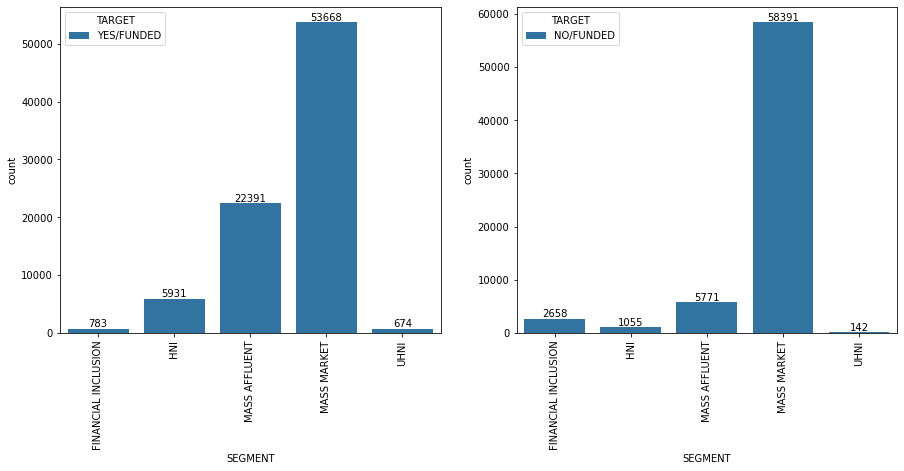

In [16]:
plt.figure(figsize = [15,6])

plt.subplot(1,2,1)

order_seg1 = fundedyes['SEGMENT'].value_counts().sort_index().index
hue_order1 = fundedyes['TARGET'].value_counts().sort_values().index
plt.xticks(rotation=90)
ax = sns.countplot(data = fundedyes, x= 'SEGMENT', hue = 'TARGET', order = order_seg1, hue_order=hue_order1);
ax.bar_label(ax.containers[0]);


plt.subplot(1,2,2)

order_seg2 = fundedno['SEGMENT'].value_counts().sort_index().index
hue_order2 = fundedno['TARGET'].value_counts().sort_values().index
plt.xticks(rotation=90)

ax = sns.countplot(data = fundedno, x= 'SEGMENT', hue = 'TARGET', order = order_seg2, hue_order=hue_order2);
ax.bar_label(ax.containers[0]);




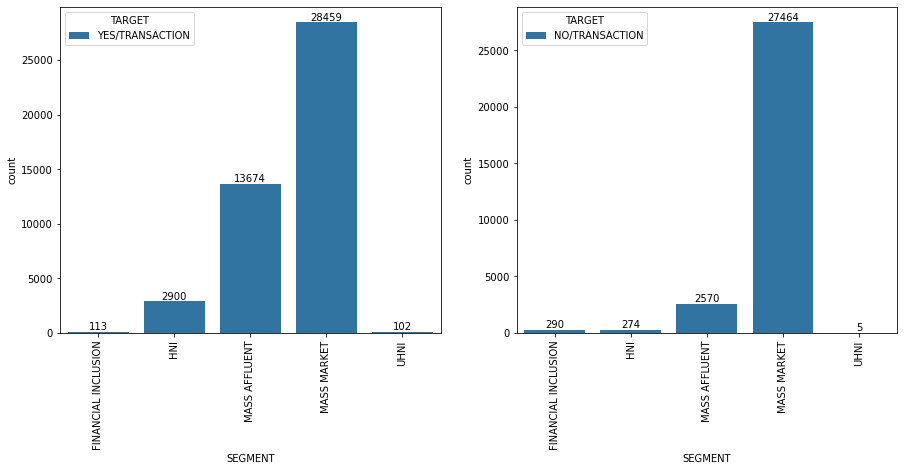

In [17]:
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)

order_seg3 = transactionyes['SEGMENT'].value_counts().sort_index().index
hue_order3 = transactionyes['TARGET'].value_counts().sort_values().index
plt.xticks(rotation=90)

ax = sns.countplot(data = transactionyes, x= 'SEGMENT', hue = 'TARGET', order = order_seg3, hue_order=hue_order3);
ax.bar_label(ax.containers[0]);


plt.subplot(1,2,2)

order_seg4 = transactionno['SEGMENT'].value_counts().sort_index().index
hue_order4 = transactionno['TARGET'].value_counts().sort_values().index
plt.xticks(rotation=90)

ax = sns.countplot(data = transactionno, x= 'SEGMENT', hue = 'TARGET', order = order_seg4, hue_order=hue_order4);
ax.bar_label(ax.containers[0]);

- This basically shows that the segment that has the highest number of observations.

In [18]:
#create a column for USSD Status

def ussd(df):
    if (df['USSD_COUNT'] <= 0):
        return 'N'
    else:
        return 'Y'
    

In [19]:
#create a column for Mobile Status

def mobile(df):
    if (df['MOBILE_COUNT'] <= 0):
        return 'N'
    else:
        return 'Y'

In [20]:
df['HAS_MOBILE'] = df.apply(lambda x:mobile(x), axis=1)

In [21]:
df['HAS_USSD'] = df.apply(lambda x:ussd(x), axis=1)

In [22]:
def add_category(df):
    if (df['TARGET'] in ['YES/FUNDED','NO/FUNDED']):
        return 'FUNDED'
    else:
        return 'TRANSACTION'

In [23]:
df['CATEGORY'] = df.apply(lambda x:add_category(x), axis = 1)

In [24]:
mask = pd.DataFrame(df.groupby(['CATEGORY','SEGMENT','TARGET'])['BRANCH_CODE'].count())
mask.reset_index(inplace=True)

In [25]:
#creating a dictionary that has the running total by segment and target

mask2 = pd.DataFrame(mask.groupby(['SEGMENT','CATEGORY'])['BRANCH_CODE'].sum())

mask2.reset_index(inplace= True)
mask2

,SEGMENT,CATEGORY,BRANCH_CODE
0,FINANCIAL INCLUSION,FUNDED,3441
1,FINANCIAL INCLUSION,TRANSACTION,403
2,HNI,FUNDED,6986
3,HNI,TRANSACTION,3174
4,MASS AFFLUENT,FUNDED,28162
5,MASS AFFLUENT,TRANSACTION,16244
6,MASS MARKET,FUNDED,112059
7,MASS MARKET,TRANSACTION,55923
8,UHNI,FUNDED,816
9,UHNI,TRANSACTION,107


In [26]:
#create a custom column that adds the running total

def add_running_total(mask):
    if (mask['CATEGORY'] == 'FUNDED'):
        if (mask['SEGMENT'] == 'BUSINESS'):
            return 8
        elif (mask['SEGMENT'] == 'CORPORATE'):
            return 1
        elif (mask['SEGMENT'] == 'FINANCIAL INCLUSION'):
            return 3441
        elif (mask['SEGMENT'] == 'HNI'):
            return 6986
        elif (mask['SEGMENT'] == 'MASS AFFLUENT'):
            return 28162
        elif (mask['SEGMENT'] == 'MASS MARKET'):
            return 112127
        elif (mask['SEGMENT'] == 'UHNI'):
            return 816
        elif (mask['SEGMENT'] == 'MSME'):
            return 706
    if (mask['CATEGORY'] == 'TRANSACTION'):
        if (mask['SEGMENT'] == 'FINANCIAL INCLUSION'):
            return 403
        elif (mask['SEGMENT'] == 'HNI'):
            return 3174
        elif (mask['SEGMENT'] == 'MASS AFFLUENT'):
            return 16244
        elif (mask['SEGMENT'] == 'MASS MARKET'):
            return 55936
        elif (mask['SEGMENT'] == 'UHNI'):
            return 107
        elif (mask['SEGMENT'] == 'MSME'):
            return 21

In [27]:
mask['RUNNING_TOTAL'] = mask.apply(lambda x: add_running_total(x), axis =1)

In [28]:
mask['% CONTRIBUTION'] = ((mask['BRANCH_CODE']/mask['RUNNING_TOTAL'])*100).round().astype(str)+'%'

In [29]:
mask.replace({'BRANCH_CODE':'FREQUENCY'},inplace=True)
mask.drop('BRANCH_CODE',axis=1)

,CATEGORY,SEGMENT,TARGET,RUNNING_TOTAL,% CONTRIBUTION
0,FUNDED,FINANCIAL INCLUSION,NO/FUNDED,3441,77.0%
1,FUNDED,FINANCIAL INCLUSION,YES/FUNDED,3441,23.0%
2,FUNDED,HNI,NO/FUNDED,6986,15.0%
3,FUNDED,HNI,YES/FUNDED,6986,85.0%
4,FUNDED,MASS AFFLUENT,NO/FUNDED,28162,20.0%
5,FUNDED,MASS AFFLUENT,YES/FUNDED,28162,80.0%
6,FUNDED,MASS MARKET,NO/FUNDED,112127,52.0%
7,FUNDED,MASS MARKET,YES/FUNDED,112127,48.0%
8,FUNDED,UHNI,NO/FUNDED,816,17.0%
9,FUNDED,UHNI,YES/FUNDED,816,83.0%


- The table above shows the segments with their respsctive response rate, grouped by the Category
- The follwing segments: 'HNI', 'MASS AFFLUENT', 'UHNI' have the highest response rate for the FUNDING CAMPAIGN(Fund & Win, Fund to Card)
- The follwing segments: 'HNI', 'MASS AFFLUENT', 'UHNI' also has the highest response rate for the TRANSACTION CAMPAIGN
- Albeit, the response of the MASS MARKET(which is the ~90% of the retail customers) is about 50% - note: This is from a subset of the total population(5.2m).
- The customers to be campaigned to should be sterilized to ensure a better conversion
- Stratification used be should as a technique for customer selection.

In [30]:
state_mask = pd.DataFrame(df.groupby(['CATEGORY','STATE','TARGET'])['BRANCH_CODE'].count())
state_mask.reset_index(inplace=True)

In [31]:
state_mask.sort_values(by='BRANCH_CODE', ascending=False).head(25)

,CATEGORY,STATE,TARGET,BRANCH_CODE
61,FUNDED,LAGOS STATE,YES/FUNDED,21018
60,FUNDED,LAGOS STATE,NO/FUNDED,17964
157,TRANSACTION,LAGOS STATE,YES/TRANSACTION,11380
9,FUNDED,ANAMBRA STATE,YES/FUNDED,6365
156,TRANSACTION,LAGOS STATE,NO/TRANSACTION,6274
37,FUNDED,FEDERAL CAPITAL TERRITORY (F.C.T,YES/FUNDED,5940
8,FUNDED,ANAMBRA STATE,NO/FUNDED,5333
83,FUNDED,RIVERS STATE,YES/FUNDED,4746
36,FUNDED,FEDERAL CAPITAL TERRITORY (F.C.T,NO/FUNDED,4711
82,FUNDED,RIVERS STATE,NO/FUNDED,4170


In [32]:
df.drop(columns =['CATEGORY'], axis=1, inplace=True)

In [33]:
#remove duplicates

q1,q2 = df['BALANCE'].quantile([0.1,0.9])
first_mask = df['BALANCE'].between(q1,q2)

df = df[first_mask]

In [34]:
temp = df.copy()

In [35]:
temp['TARGET'] = LabelEncoder().fit_transform(temp['TARGET'])

In [36]:
correlation = temp.corr(method = 'spearman')

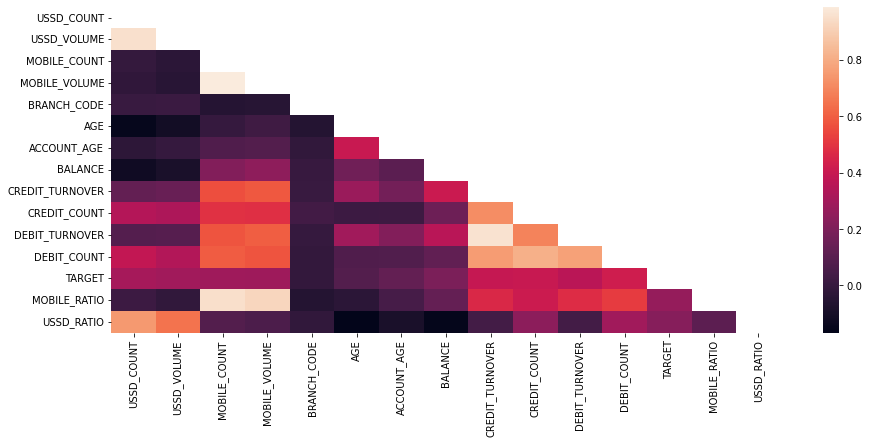

In [37]:
#get correlation against the target variable
plt.figure(figsize=[15,6]);
masking = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, mask=masking);

In [38]:
df.drop(columns='BALANCE',inplace=True)

In [40]:
# #standardize the numeric features
# numeric_features = df.select_dtypes('number')
# for s in numeric_features.columns:
#     scaler = StandardScaler().fit(numeric_features[[s]])
#     df[s] = scaler.transform(numeric_features[[s]])

In [41]:
#create a lopp to run throught the categorical variables and label them
cat = df.select_dtypes('object')
for i in cat:
    df[i] = LabelEncoder().fit_transform(df[i])

#### Data Modelling

In [42]:
y = df['TARGET']
X = df.drop(columns ='TARGET')

In [43]:
y.reset_index().drop('index',axis=1).squeeze()

0         2
1         0
2         2
3         2
4         1
         ..
181846    2
181847    2
181848    0
181849    2
181850    0
Name: TARGET, Length: 181851, dtype: int32

### Data Modelling

In [45]:
#using the train-test split to split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("The shape of the X_train is:" ,X_train.shape)
print("The shape of the X_test is:" ,X_test.shape)
print("The shape of the y_train is:" ,y_train.shape)
print("The shape of the y_test is:", y_test.shape)

The shape of the X_train is: (145480, 20)
The shape of the X_test is: (36371, 20)
The shape of the y_train is: (145480,)
The shape of the y_test is: (36371,)


In [46]:
#creating the model dictionary
model_dict = {
    'Naive Bayes': GaussianNB(),
    'Gradient Descent': SGDClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(),
    'Artificial Neural Network': MLPClassifier()    
}

#### Hyperparameter Tuning

In [47]:
#Optimize the hyperparameter of the models using Optuna

def objective(trial):
    
    classifier = trial.suggest_categorical('classifier',['Random Forest','ANN'])
    
    if classifier == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators',100,1000,10)
        max_depth = trial.suggest_int('max_depth',10,100,2)
        max_features = trial.suggest_categorical('max_features',['auto','sqrt'])
        
        
        clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
        
    else:
        hidden_layer_size = trial.suggest_int('hidden_layer_size', 30,150,30)
        activation = trial.suggest_categorical('activation',['tanh','relu'])
        solver = trial.suggest_categorical('solver',['sgd','adam'])
        alpha = trial.suggest_float('alpha',0.0001,0.05)
        learning_rate = trial.suggest_categorical('learning_rate',['constant','adaptive'])
        
        clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size,activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate)
        
    return cross_val_score(clf,X_train,y_train, n_jobs=-1,cv=3).mean()

In [42]:
#call the objective to study and get the best hyperparameters for the algorithms

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

trial = study.best_trial

print('Model Accuracy: {}'.format(trial.value))
print('Best Hyperparameter: {}'.format(trial.params))


[I 2022-11-29 12:48:17,757] A new study created in memory with name: no-name-be8a038c-1d95-46d8-927f-4eed7e7d9b1a
[I 2022-11-29 12:50:26,147] Trial 0 finished with value: 0.6109362040389666 and parameters: {'classifier': 'Random Forest', 'n_estimators': 200, 'max_depth': 50, 'max_features': 'auto'}. Best is trial 0 with value: 0.6109362040389666.
[I 2022-11-29 12:52:57,793] Trial 1 finished with value: 0.6109705870100309 and parameters: {'classifier': 'Random Forest', 'n_estimators': 190, 'max_depth': 62, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6109705870100309.
[I 2022-11-29 12:59:26,022] Trial 2 finished with value: 0.5589840473154791 and parameters: {'classifier': 'ANN', 'hidden_layer_size': 120, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02870066547088561, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.6109705870100309.
[I 2022-11-29 13:00:39,277] Trial 3 finished with value: 0.5206351701313313 and parameters: {'classifier': 'ANN', 'hidden_layer_

Model Accuracy: 0.6126546678158763
Best Hyperparameter: {'classifier': 'Random Forest', 'n_estimators': 1000, 'max_depth': 100, 'max_features': 'sqrt'}


In [44]:
study.best_params

{'classifier': 'Random Forest',
 'n_estimators': 1000,
 'max_depth': 100,
 'max_features': 'sqrt'}

The Training classification Report below:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41702
           1       1.00      1.00      1.00     19102
           2       1.00      1.00      1.00     53934
           3       1.00      1.00      1.00     30742

    accuracy                           1.00    145480
   macro avg       1.00      1.00      1.00    145480
weighted avg       1.00      1.00      1.00    145480

The Test classification Report below:
               precision    recall  f1-score   support

           0       0.71      0.57      0.64     10556
           1       0.49      0.40      0.44      4589
           2       0.60      0.67      0.63     13399
           3       0.63      0.72      0.67      7827

    accuracy                           0.62     36371
   macro avg       0.61      0.59      0.60     36371
weighted avg       0.62      0.62      0.62     36371



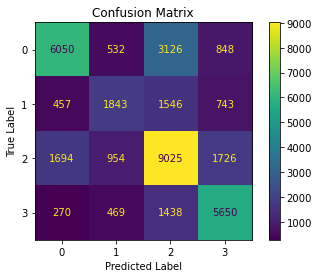

In [46]:
model = RandomForestClassifier()

model.fit(X_train,y_train)
train_class_report = classification_report(y_train, model.predict(X_train))
test_class_report = classification_report(y_test,model.predict(X_test))    
    

    
print("The Training classification Report below:\n", train_class_report)
print("The Test classification Report below:\n", test_class_report)


##ConfusionMatrixDisplay(model,X_test,y_test);

    
    #create the cofusion matrix
    #plot the confusion matrix


model_confusion_matrix = plot_confusion_matrix(model, X_test,y_test)
model_confusion_matrix.ax_.set_title('Confusion Matrix')
    #ax.xaxis.set_ticklabels(['No/Funded','No/Transaction','Yes/Funded','Yes/Transaction'])
    #ax.yaxis.set_ticklabels(['No/Funded','No/Transaction','Yes/Funded','Yes/Transaction'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params()
plt.gcf().axes[1].tick_params()
plt.show()

#print('==========================================================================================================')